### Image Pipeline

<ol>
<li> Take a picture of your face or have a friend do it.</li>
<li> Import the image into Jupyter Notebook. </li>
<li> Analyze the image </li>
<li> Create a histogram of the whole image. RGB </li>
<li> Modify your image with brightness and contrast. </li>
<li> Mask out your face. </li>
<li> Use the mask to create a HSV histogram. </li>
<li> Analyze the histogram for skin tone ranges. </li>
<li> Use the HSV ranges to create a mask. </li>
<li> Apply the mask to the image and segment out your skin/face </li>
<ol>

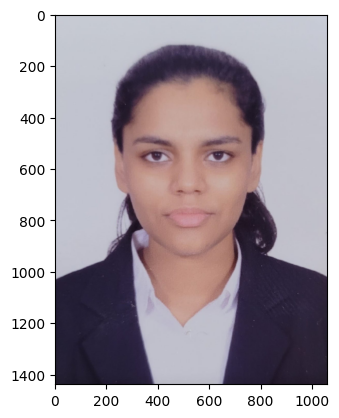

In [1]:
# Required Libraries
import cv2                   # OpenCV library for computer vision tasks.
import numpy as np           # Numpy library for numerical operations.
import matplotlib.pyplot as plt  # Matplotlib for plotting and visualization.

# Load an image from the specified path.
# Note: OpenCV by default reads images in BGR format (Blue-Green-Red).
img = cv2.imread("C:\\Users\\AKANKSHA\\OneDrive\\Desktop\\Image_Processing_Project_Akanksha_Bable\\Image.jpg")

# Convert the image color format from BGR to RGB.
# Matplotlib's `imshow` expects the image in RGB format. 
# Hence, to view the image correctly, we need to perform this conversion.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib.
# The `imshow` function of matplotlib displays the image.
plt.imshow(img)
# Optionally, you can add plt.show() here to display the image in a window.


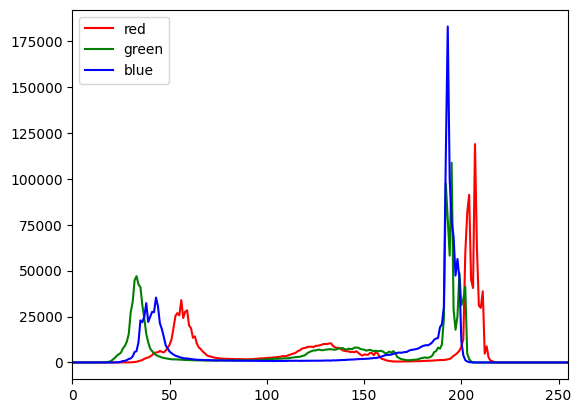

In [2]:
# Required Libraries
import cv2                       # OpenCV library for computer vision tasks.
import numpy as np               # Numpy library for numerical operations.
import matplotlib.pyplot as plt # Matplotlib for plotting and visualization.

# Assuming the image was loaded previously using `cv2.imread()`
# Convert the image color format from BGR to RGB.
# Matplotlib's `imshow` and other functions expect the image in RGB format.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate the histogram for the R (Red) channel.
# `cv2.calcHist()` function calculates the histogram of an image.
# Here, [0] denotes that we are specifying the first channel (R channel).
# The range [0, 255] specifies the intensity values for the histogram.
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
# Plot the histogram using matplotlib. Color it red since it's for the R channel.
plt.plot(hist, color='red')
# Limit x-axis values between 0 and 255 for clarity.
plt.xlim([0, 255])

# Repeat the process for the G (Green) channel.
hist = cv2.calcHist([img], [1], None, [256], [0, 255])
plt.plot(hist, color='green')
plt.xlim([0, 255])

# Repeat the process for the B (Blue) channel.
hist = cv2.calcHist([img], [2], None, [256], [0, 255])
plt.plot(hist, color='blue')
plt.xlim([0, 255])

# Add a legend to the plot to identify each color.
# 'upper left' positions the legend at the top left corner of the plot.
plt.legend(('red', 'green', 'blue'), loc='upper left')

# Display the histogram.
# This command pops up a window showing the combined histogram for RGB channels.
plt.show()


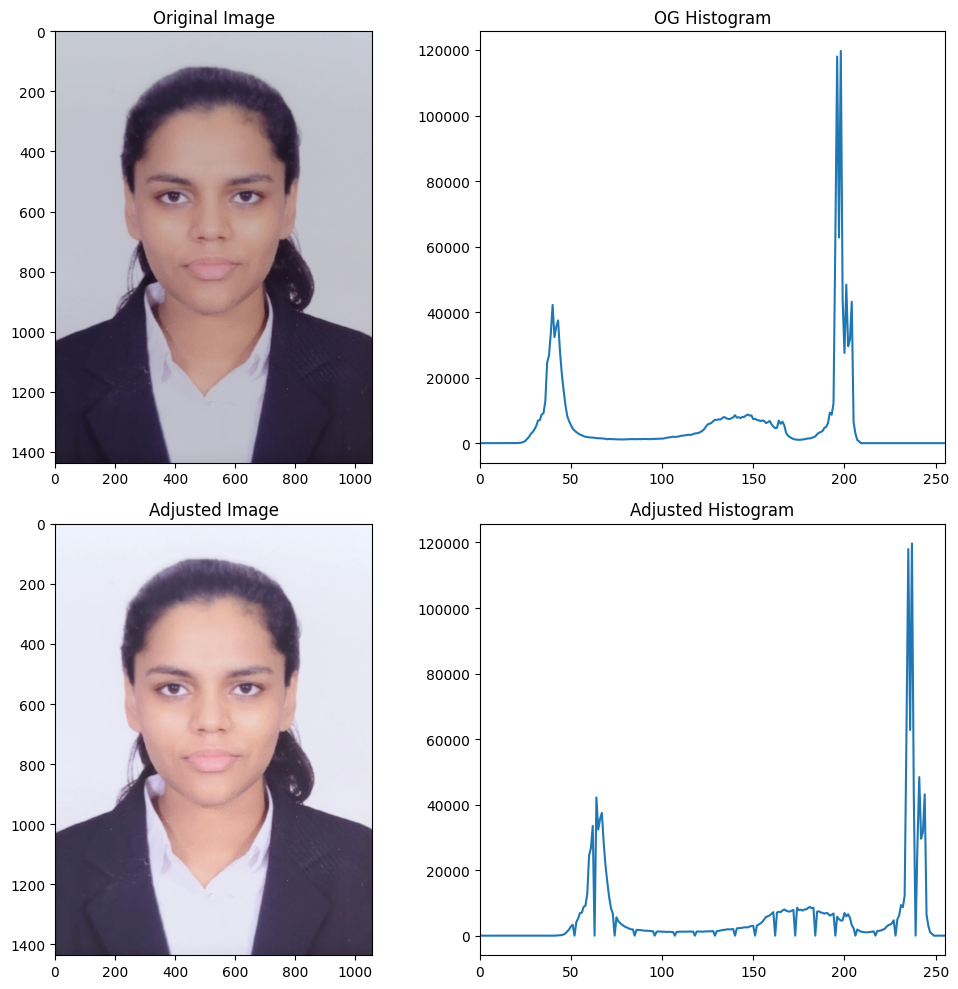

In [3]:
# Import necessary libraries
import cv2                       # OpenCV for image processing tasks
import numpy as np               # Numpy for numerical operations
import matplotlib.pyplot as plt # Matplotlib for plotting and visualization

# Define a function to adjust brightness and contrast of an image
def adjust_brightness_contrast(image_array, alpha, beta):
    """
    Adjusts brightness and contrast of an image.
    
    Parameters:
    - image_array: numpy array of the image
    - alpha: float, scaling factor to adjust contrast (1 means no change)
    - beta: float, value added to all pixels to adjust brightness

    Returns:
    - Adjusted image as a numpy array
    """
    
    # Convert to floating point to avoid overflow and underflow issues
    temp = image_array.astype('float32')
    
    # Adjust contrast
    temp *= alpha
    
    # Adjust brightness
    temp += beta
    
    # Clip values to be in the range [0, 255] to ensure valid pixel values
    temp = np.clip(temp, 0, 255)
    
    return temp.astype('uint8')

# (1) Image Enhancement

# Read the image from the specified path
img_color = cv2.imread('C:\\Users\\AKANKSHA\\OneDrive\\Desktop\\Image_Processing_Project_Akanksha_Bable\\Image.jpg')

# Convert the image color format from BGR to RGB (as OpenCV loads in BGR by default)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Convert RGB image to grayscale for histogram calculation
img_bw = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Calculate the histogram for the grayscale image
hist = cv2.calcHist([img_bw],[0],None,[256],[0,255])

# Adjust brightness and contrast using the given parameters
contrast = 1.1
brightness = 20
adjusted_img_color = adjust_brightness_contrast(img_color, contrast, brightness) 
adjusted_img_bw = adjust_brightness_contrast(img_bw, contrast, brightness)

# Calculate histogram of adjusted grayscale image
adjusted_hist = cv2.calcHist([adjusted_img_bw],[0],None,[256],[0,255]) 

# Plotting

# Create a figure with a specified size
plt.figure(figsize=(10,10))

# Original color image
plt.subplot(2, 2, 1)
plt.imshow(img_color)
plt.title('Original Image')

# Histogram of the original grayscale image
plt.subplot(2, 2, 2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('OG Histogram')

# Adjusted color image
plt.subplot(2, 2, 3)
plt.imshow(adjusted_img_color, vmin=0, vmax=255)
plt.title('Adjusted Image')

# Histogram of the adjusted grayscale image
plt.subplot(2, 2, 4)
plt.plot(adjusted_hist)
plt.xlim([0,255])
plt.title('Adjusted Histogram')

# Adjust spacing between subplots
plt.tight_layout()

# Display all the subplots
plt.show()


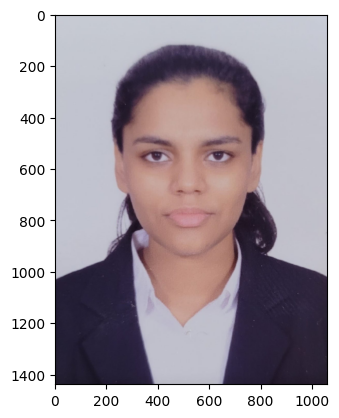

In [4]:
# Importing necessary libraries
import cv2                       # OpenCV library for computer vision tasks
import numpy as np               # Numpy library for numerical operations
import matplotlib.pyplot as plt # Matplotlib library for plotting and visualization

# Load an image from the specified path
# Note: By default, OpenCV reads images in BGR (Blue-Green-Red) format.
img = cv2.imread("C:\\Users\\AKANKSHA\\OneDrive\\Desktop\\Image_Processing_Project_Akanksha_Bable\\Image.jpg")

# Convert the image color format from BGR to RGB.
# This conversion is essential because matplotlib's `imshow` function 
# expects images in RGB (Red-Green-Blue) format.
# If we don't perform this conversion, the colors will be displayed incorrectly.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib's `imshow` function.
# Here, the image will be displayed with the correct RGB colors.
plt.imshow(img)
# Note: If you run this outside of a Jupyter notebook or similar environment, 
# you may also need `plt.show()` to actually display the image in a new window.


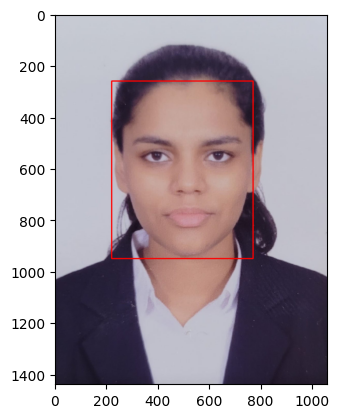

In [5]:
# Import OpenCV library
import cv2

# The OpenCV rectangle function
# The cv2.rectangle() function is used to draw a rectangle on an image.

# Here's a breakdown of its parameters:
# img - The image on which the rectangle is to be drawn.
# top_left - The coordinates for the top-left vertex of the rectangle.
# bottom_right - The coordinates for the bottom-right vertex of the rectangle.
# rect_color - The color of the rectangle, typically given as (R, G, B).
# thickness - Thickness of the rectangle's edges. If negative, it fills the rectangle.

# Specify the coordinates for the top-left corner of the rectangle.
top_left = (220,260)

# Specify the coordinates for the bottom-right corner of the rectangle.
bottom_right = (770,950)

# Define the color of the rectangle in RGB format.
# In this case, it's blue (255,0,0).
rect_color = (255,0,0)

# Define the thickness of the rectangle's edges.
# A thickness of 3 means the rectangle will have a solid border of 3 pixels width.
thickness = 3

# Draw the rectangle on the image using the defined parameters.
# Note that this operation is in-place, meaning it will modify the input image.
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Display the image with the rectangle using matplotlib's imshow function.
plt.imshow(img_rect)


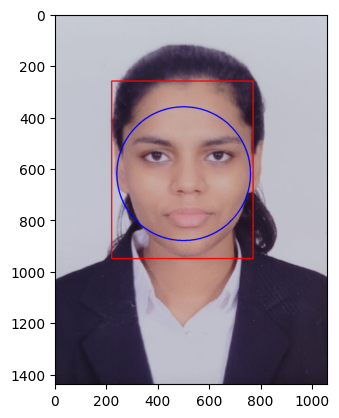

In [6]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt

# The OpenCV circle function
# The cv2.circle() function is used to draw a circle on an image.

# Here's a breakdown of its parameters:
# img - The image on which the circle will be drawn.
# center_circle - The coordinates of the center of the circle.
# radius - The radius of the circle.
# circle_color - The color of the circle, typically given as (R, G, B).
# thickness - Thickness of the circle's outline. If negative, it will fill the circle.

# Specify the coordinates for the center of the circle.
center_circle = (500,620)

# Specify the desired radius of the circle.
radius = 260


# Define the color of the circle in RGB format.
# In this case, it's red (0,0,255).
circle_color = (0, 0, 255)

# Draw the circle on the image using the defined parameters.
# Note: This operation modifies the image in-place, so the original content will be changed.
img_circle = cv2.circle(img, center_circle, radius, circle_color, thickness)

# Display the image containing the drawn circle using matplotlib's imshow function.
plt.imshow(img_circle)


In [7]:
# We're starting by specifying the coordinates of a rectangle for reference.
# These might be coordinates that encapsulate a region of interest within the image, 
# such as a detected object, face, or any specific region you might want to focus on.

# Top left corner of rectangle
# This tuple represents the x and y coordinates of the top-left corner of the rectangle.


# Now, we will import an image using OpenCV.
# The imread function from OpenCV is used to load an image from a given path.

# Load an image from the specified path.
# By default, OpenCV reads images in the BGR (Blue-Green-Red) color space.
img = cv2.imread("C:\\Users\\AKANKSHA\\OneDrive\\Desktop\\Image_Processing_Project_Akanksha_Bable\\Image.jpg")

# Convert the image color space from BGR to RGB.
# This step is crucial when using matplotlib or other libraries that expect the image in RGB format.
# OpenCV uses BGR by default, so this conversion ensures correct color representation when visualizing the image.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


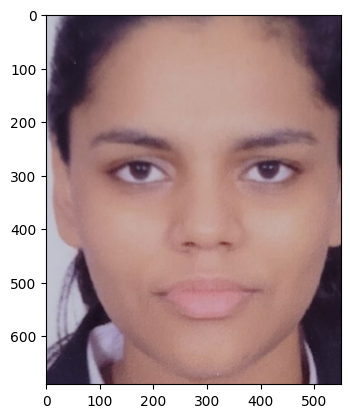

In [8]:
# We want to extract a specific region of the image, often called "region of interest" or "ROI".
# In this case, the region to be extracted is determined by the rectangle coordinates mentioned previously.

# Specify the coordinates for the top-left corner of the rectangle.
#top_left = (220,260)

# Specify the coordinates for the bottom-right corner of the rectangle.
#bottom_right = (770,950) 

# Extract the region of interest (ROI) from the original image:
# The syntax `img[y1:y2, x1:x2]` is used to slice the image array.
# Here, y1:y2 represents the row indices (vertical span) and x1:x2 represents the column indices (horizontal span).
# Thus, img[60:220, 175:320] extracts the rectangular region starting from 
# (175,60) (top-left corner) to (320,220) (bottom-right corner).
img_masked = img[260:950, 220:770]

# Display the extracted region using matplotlib's imshow function.
# This will show only the specific region from the original image enclosed by the rectangle.
plt.imshow(img_masked)


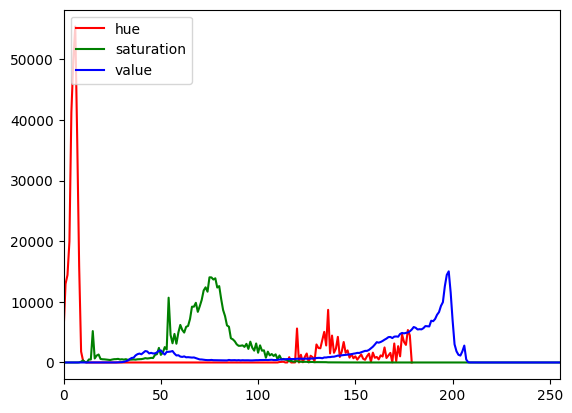

In [9]:
# Our primary goal here is to create histograms for the Hue, Saturation, and Value channels of the HSV image.

# Convert the RGB image to HSV color space:
# The cv2.cvtColor function is utilized to change the color representation of the image from RGB to HSV.
# This conversion is necessary because the Hue, Saturation, and Value (HSV) offer a more intuitive 
# way to represent color than the traditional RGB model.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

# Generate and plot the histogram for the Hue channel:
# The hue is the color type and varies from 0 to 179 in OpenCV. 
hist = cv2.calcHist([img_masked],[0],None,[180],[0,179])
# Plot the Hue histogram with a red color.
plt.plot(hist, color='red')
# Set the x-axis limit from 0 to 179 (typical range for hue in OpenCV).
plt.xlim([0,179])

# Generate and plot the histogram for the Saturation channel:
# Saturation is the intensity of the color, going from 0 to 255.
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Plot the Saturation histogram with a green color.
plt.plot(hist, color='green')
# Maintain the x-axis range to [0, 255].
plt.xlim([0,255])

# Generate and plot the histogram for the Value channel:
# Value is the brightness of the color, also ranging from 0 to 255.
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Plot the Value histogram with a blue color.
plt.plot(hist, color='blue')
# Continue to maintain the x-axis range to [0, 255].
plt.xlim([0,255])

# Add a legend to differentiate between the histograms of the three channels.
# The legend identifies the three plots using labels: hue, saturation, and value.
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Finally, display the combined histogram using matplotlib.
plt.show()


In [10]:
# We aim to create a binary mask for a specific region of the image. This mask will help us isolate
# or focus on certain parts of an image during image processing tasks.

# Create an empty 2D array (or matrix) of the same dimensions as our image. 
# This array is filled with zeros, representing a black mask initially.
# Note that we use the image's shape (height and width) but exclude the channel dimension using img.shape[:2].
# The data type "uint8" is specified so that the array can hold values between 0 and 255, which is typical for grayscale images.
mask = np.zeros(img.shape[:2], np.uint8) 

# Modify a specific region of the mask to set it to white. 
# Using array slicing, we select the region [60:220, 175:320], which corresponds to the rectangular area 
# from the point (175,60) to the point (320,220). We then set this entire region to 255, which represents white in grayscale.
mask[260:950, 220:770] = 255

# Print out the shape of the mask to verify that its dimensions match those of the original image (ignoring the channel dimension).
print(mask.shape)


(1438, 1058)


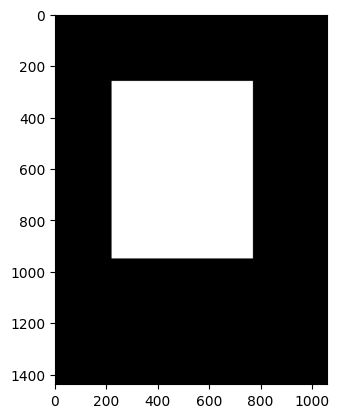

In [11]:
# The goal here is to display the binary mask using matplotlib. 

# Using the imshow function of matplotlib to display the mask.
# The 'cmap="gray"' argument specifies that the mask should be displayed in grayscale.
# In grayscale, pixel values range from 0 (black) to 255 (white).
# For our mask, the specific rectangular region will appear white while the rest is black.
plt.imshow(mask, cmap="gray")


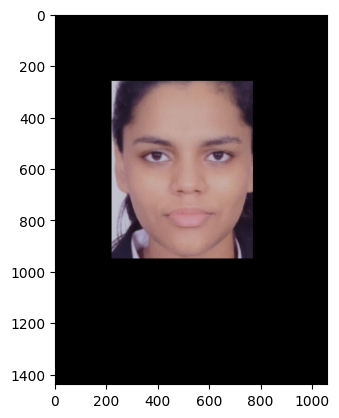

In [12]:
# The primary objective is to apply the binary mask to the original image, effectively 
# overlaying the mask onto the image to highlight or "reveal" a specific region.

# Read the image again from the specified path.
# OpenCV reads images in BGR format by default.
img = cv2.imread("C:\\Users\\AKANKSHA\\OneDrive\\Desktop\\Image_Processing_Project_Akanksha_Bable\\Image.jpg")

# Convert the BGR image to RGB format.
# This is done to facilitate accurate plotting with matplotlib, which uses RGB format.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply the mask to the image using the bitwise AND operation.
# The bitwise AND operation is performed between corresponding pixels of the two input images (in this case, img and img).
# However, this operation is only carried out where the mask has white pixels (value 255).
# Resultantly, regions of the image where the mask is black (value 0) will be set to black in the output image.
# Thus, only the specific rectangular region defined by the mask will be retained in the output, 
# while the rest of the image will be black.
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Display the masked image using matplotlib.
# Only the area corresponding to the white portion of the mask will be visible in the output image.
plt.imshow(img_masked)


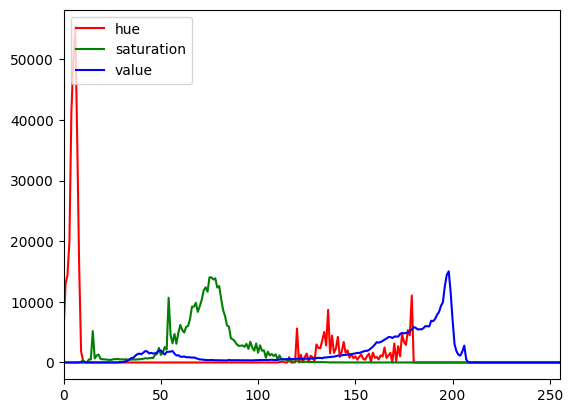

In [13]:
# The main objective here is to compute and visualize the histograms of the Hue, Saturation, and Value channels 
# of an image in HSV color space. Importantly, these histograms will only consider the region defined by the mask.

# Convert the RGB image to HSV format.
# The HSV representation is often used in image processing because it separates the image intensity 
# (i.e., Value) from the color information (i.e., Hue and Saturation).
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Compute the histogram for the Hue channel of the image.
# Only the pixels in the region defined by the white portion of the mask are considered.
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Plot the Hue histogram in red.
plt.plot(hist, color='red')
# Restrict the x-axis of the plot to the range [0,255] for clarity.
plt.xlim([0,255])

# Compute the histogram for the Saturation channel of the image.
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Plot the Saturation histogram in green.
plt.plot(hist, color='green')
# The x-axis remains restricted to the range [0,255].
plt.xlim([0,255])

# Compute the histogram for the Value channel of the image.
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Plot the Value histogram in blue.
plt.plot(hist, color='blue')
# Keep the x-axis restricted to the range [0,255].
plt.xlim([0,255])

# Add a legend to the plot to indicate which color corresponds to which channel.
plt.legend(('hue', 'saturation', 'value'), loc='upper left')

# Finally, display the combined histogram plot.
plt.show()


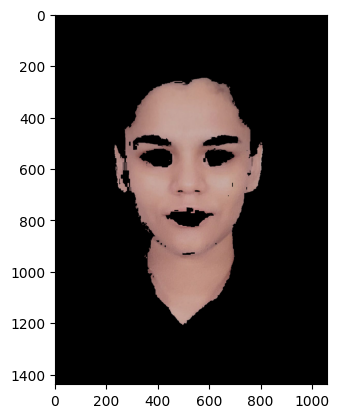

In [14]:
# Define minimum and maximum values for the HSV channels.
min_HSV = np.array([0,0,0], np.uint8)
max_HSV = np.array([10,110,220], np.uint8)

# Create a binary mask where the pixels within the specified HSV range have a value of 255 and 
# the ones outside the range have a value of 0.
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Apply the binary mask to the original image. Pixels outside of the specified HSV range will be black.
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert the masked image from HSV to RGB color space.
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Display the masked RGB image.
plt.imshow(skinHSV)
